In [1]:
import pandas as pd
import seaborn as sns


In [22]:
labels = pd.read_csv('/fast/rsna-breast/train.csv')
labels

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


In [26]:
labels.describe()

,site_id,patient_id,image_id,age,cancer,biopsy,invasive,BIRADS,implant,machine_id
count,54706.000000,54706.000000,5.470600e+04,54669.000000,54706.000000,54706.000000,54706.000000,26286.000000,54706.000000,54706.000000
mean,1.460407,32698.865262,1.079386e+09,58.543928,0.021168,0.054272,0.014953,0.772350,0.026999,54.618378
std,0.498434,18893.861534,6.183269e+08,10.050884,0.143944,0.226556,0.121365,0.590062,0.162081,44.784800
min,1.000000,5.000000,6.849100e+04,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,16481.000000,5.458153e+08,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000
50%,1.000000,32432.000000,1.082689e+09,59.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
75%,2.000000,48999.000000,1.613228e+09,66.000000,0.000000,0.000000,0.000000,1.000000,0.000000,49.000000
max,2.000000,65534.000000,2.147472e+09,89.000000,1.000000,1.000000,1.000000,2.000000,1.000000,216.000000


In [36]:
'''
0: Incomplete
1: Negative
2: Benign
3: Probably benign
4: Suspicious
5: Highly suggestive of malignancy
6: Known biopsy – proven malignancy
'''

labels.BIRADS.value_counts(dropna=False)

NaN    28420
1.0    15772
0.0     8249
2.0     2265
Name: BIRADS, dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

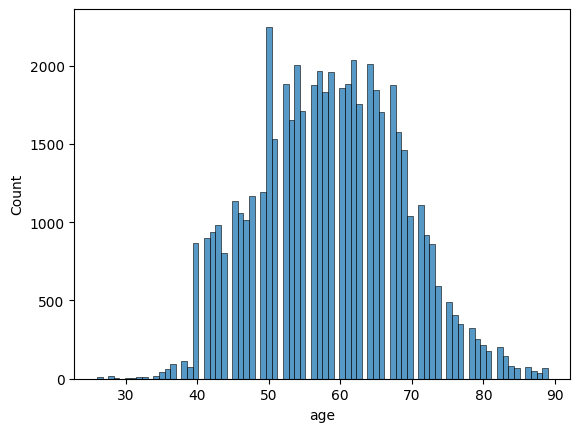

In [40]:
sns.histplot(labels.age)

<AxesSubplot: xlabel='age', ylabel='Count'>

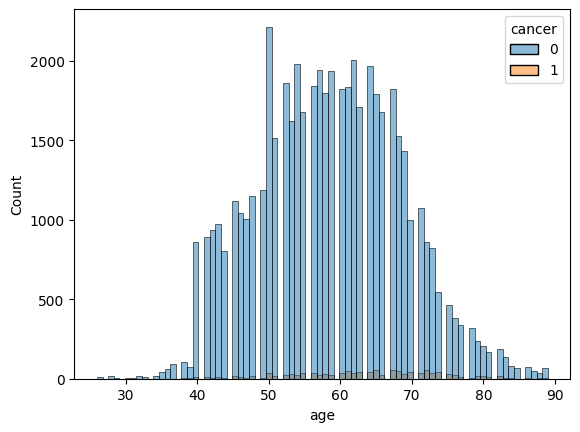

In [47]:
sns.histplot(data=labels, x='age', hue='cancer')

<AxesSubplot: xlabel='age', ylabel='Count'>

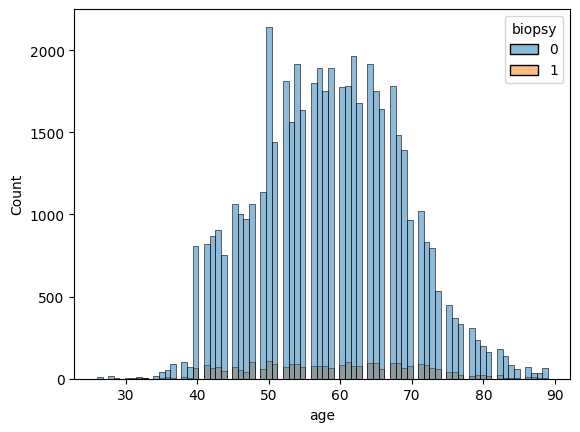

In [48]:
sns.histplot(data=labels, x='age', hue='biopsy')

<AxesSubplot: xlabel='BIRADS', ylabel='age'>

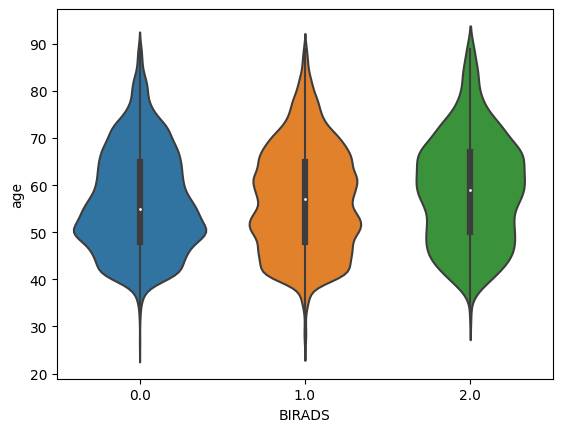

In [50]:
sns.violinplot(data=labels, x='BIRADS', y='age')

<AxesSubplot: xlabel='cancer', ylabel='age'>

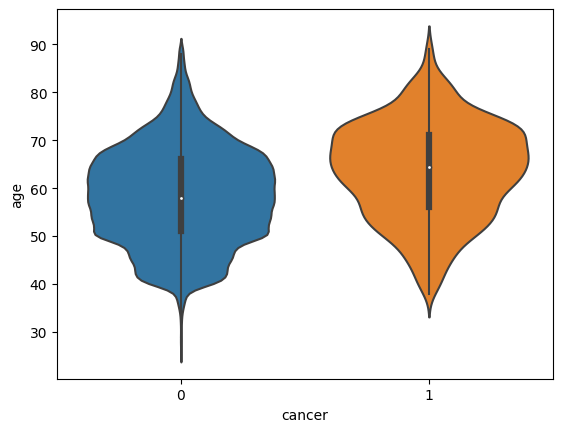

In [45]:
sns.violinplot(data=labels, x='cancer', y='age')

In [44]:
labels[~labels.age.isna()].shape

(54669, 14)

In [43]:
labels[labels.age.isna()].shape

(37, 14)

In [41]:
labels.biopsy.value_counts(dropna=False)

0    51737
1     2969
Name: biopsy, dtype: int64

In [38]:
labels.invasive.value_counts(dropna=False)

0    53888
1      818
Name: invasive, dtype: int64

In [35]:
labels.cancer.value_counts(dropna=False)

0    53548
1     1158
Name: cancer, dtype: int64

In [37]:
labels[['cancer', 'BIRADS']].value_counts()

cancer  BIRADS
0       1.0       15772
        0.0        7585
        2.0        2265
1       0.0         664
dtype: int64

In [29]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [4]:
attn = pd.read_feather('../attention_MIL/attn_scores_all.feather')
# moved to /fast/rsna-breast/tables/attn_scores_all_kind_sweep_53.feather 

In [24]:
attn = attn.merge(labels, left_on='imgID', right_on='image_id')
attn

,index,ptID,imgID,row,col,attention,raw,thresh,site_id,patient_id,...,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,0,5,640805896,0,0,0.014496,-4.149150,False,2,5,...,MLO,68.0,0,0,0,0.0,0,NaN,21,True
1,1,5,640805896,0,1,0.029417,-3.441467,False,2,5,...,MLO,68.0,0,0,0,0.0,0,NaN,21,True
2,2,5,640805896,0,2,0.125873,-1.987781,True,2,5,...,MLO,68.0,0,0,0,0.0,0,NaN,21,True
3,3,5,640805896,1,0,0.019233,-3.866422,False,2,5,...,MLO,68.0,0,0,0,0.0,0,NaN,21,True
4,4,5,640805896,1,1,0.062416,-2.689229,False,2,5,...,MLO,68.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251856,5498927,65534,1888933323,13,2,0.000923,-5.756760,False,1,65534,...,MLO,46.0,0,0,0,1.0,0,C,49,False
5251857,5498928,65534,1888933323,13,3,0.017572,-2.810361,False,1,65534,...,MLO,46.0,0,0,0,1.0,0,C,49,False
5251858,5498929,65534,1888933323,13,4,0.002848,-4.629925,False,1,65534,...,MLO,46.0,0,0,0,1.0,0,C,49,False
5251859,5498930,65534,1888933323,13,5,0.007804,-3.622030,False,1,65534,...,MLO,46.0,0,0,0,1.0,0,C,49,False


<AxesSubplot: xlabel='cancer', ylabel='raw'>

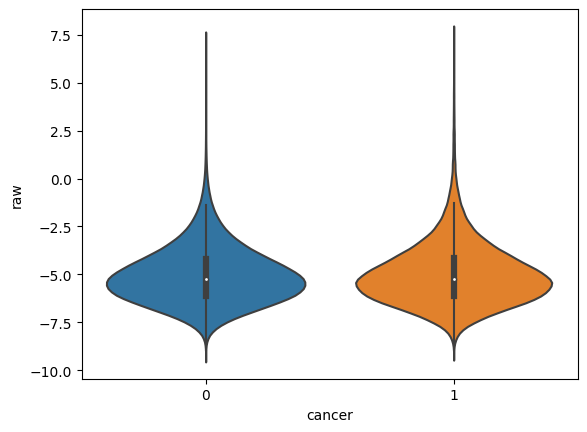

In [54]:
sns.violinplot(data=attn, x='cancer', y='raw')

<AxesSubplot: xlabel='raw', ylabel='Count'>

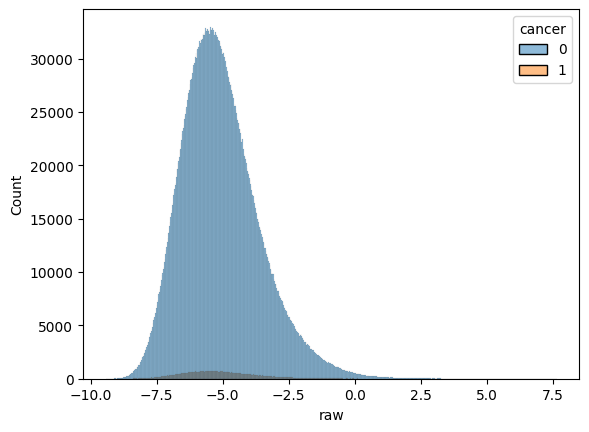

In [64]:
sns.histplot(data=attn, x='raw', hue='cancer')

In [74]:
thresh = (attn.raw.mean() + 1 * float(attn.raw.std()))
attn[attn.raw>thresh].cancer.value_counts()

0    760696
1     18094
Name: cancer, dtype: int64

In [75]:
thresh = (attn.raw.mean() + 2 * float(attn.raw.std()))
attn[attn.raw>thresh].cancer.value_counts()

0    198524
1      5555
Name: cancer, dtype: int64

0    958
1    200
Name: cancer, dtype: int64

<AxesSubplot: xlabel='raw', ylabel='Count'>

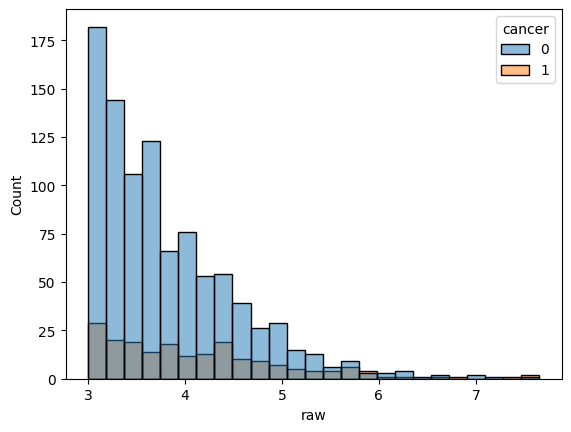

In [63]:
sns.histplot(data=attn[attn.raw>3], x='raw', hue='cancer')

<AxesSubplot: xlabel='cancer', ylabel='raw'>

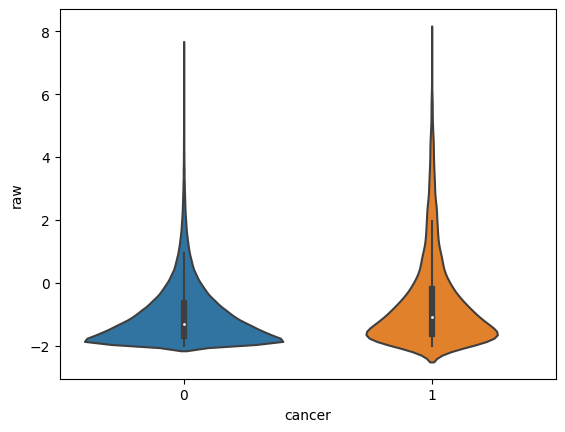

In [60]:
sns.violinplot(data=attn[attn.raw>-2], x='cancer', y='raw')

In [5]:
attn.attention

0          0.014496
1          0.029417
2          0.125873
3          0.019233
4          0.062416
             ...   
5251856    0.000923
5251857    0.017572
5251858    0.002848
5251859    0.007804
5251860    0.056377
Name: attention, Length: 5251861, dtype: float64

<AxesSubplot: xlabel='attention', ylabel='Count'>

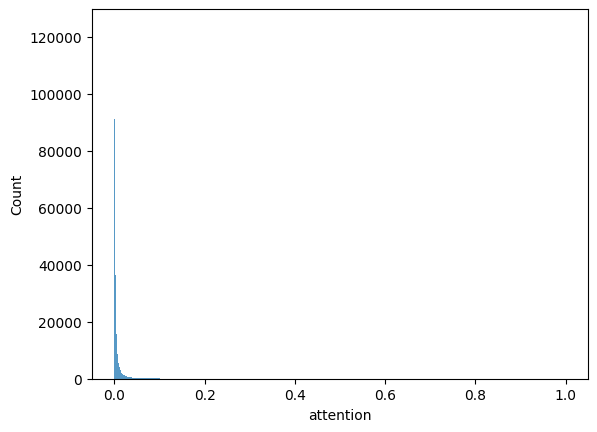

In [6]:
sns.histplot(attn.attention)

In [17]:
attn.raw.describe()

count    5.251861e+06
mean    -5.064057e+00
std      1.489812e+00
min     -9.433617e+00
25%     -6.106050e+00
50%     -5.231122e+00
75%     -4.217281e+00
max      7.653875e+00
Name: raw, dtype: float64

<AxesSubplot: xlabel='raw', ylabel='Count'>

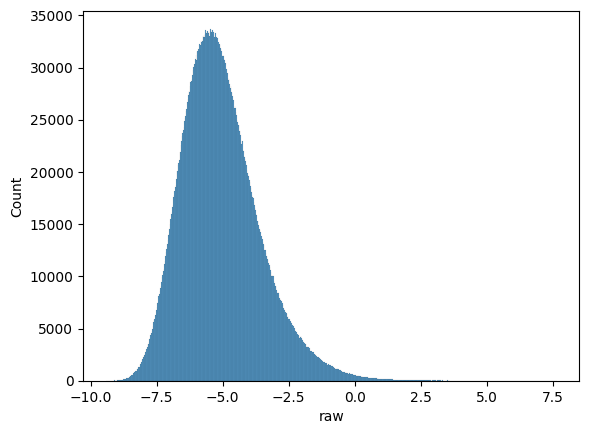

In [8]:
sns.histplot(attn.raw)

In [11]:
attn['thresh'] = attn.raw > 0
attn.thresh.value_counts()

False    5228264
True       23597
Name: thresh, dtype: int64

In [12]:
attn['thresh'] = attn.raw > -2.5
attn.thresh.value_counts()

False    4950985
True      300876
Name: thresh, dtype: int64

In [68]:
thresh = (attn.raw.mean()+2*attn.raw.std())
print(thresh)
attn['thresh'] = attn.raw > thresh
attn[['thresh', 'cancer']].value_counts()

-2.0844331736063957


thresh  cancer
False   0         4939207
True    0          198524
False   1          108575
True    1            5555
dtype: int64

In [13]:
attn['thresh'] = attn.attention > 0.5
attn.thresh.value_counts()

False    5244474
True        7387
Name: thresh, dtype: int64

In [14]:
attn['thresh'] = attn.attention > 0.25
attn.thresh.value_counts()

False    5224589
True       27272
Name: thresh, dtype: int64

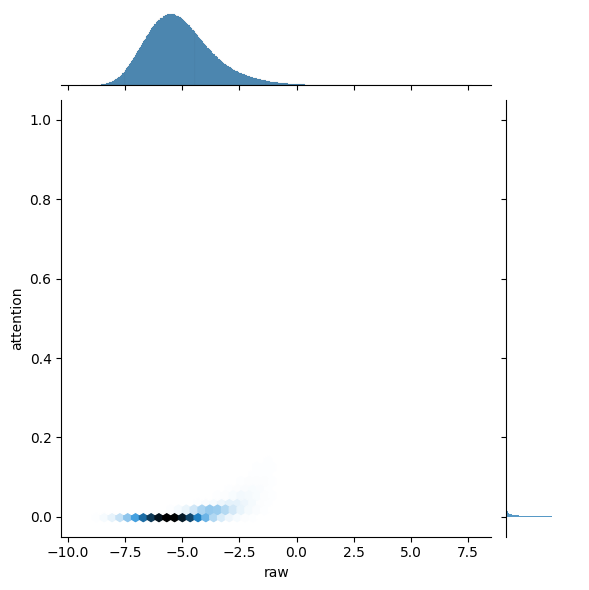

In [7]:
sns.jointplot(data=attn, x='raw', y='attention', kind='hex')

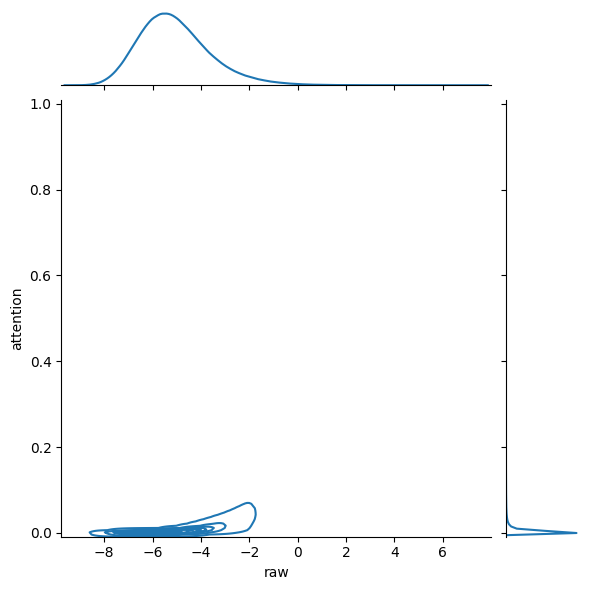

In [10]:
# not at all worth the time it took, lol
#sns.jointplot(data=attn, x='raw', y='attention', kind='kde')